In [ ]:
# df = pd.read_csv("Cleaned_SNL_18650_LFP_15C_0-100_0.5-1C_a_timeseries.csv")
# df['Cycle_Index'] = pd.to_numeric(df['Cycle_Index'])

# err_idx=[] #For errornous indicies : Cycle number didn't got reset
# miss_idx=[] #Missed Index
# for i in range(1,len(df)-1):
#     if (df['Current (A)'][i]==0 and df['Current (A)'][i+1]>0 and df['Current (A)'][i-1]<0 and (df['Cycle_Index'][i+1]==df['Cycle_Index'][i-1])):
#         err_idx.append(i)
#     if(df['Cycle_Index'][i+1]-df['Cycle_Index'][i]>1):
#         miss_idx.append(i)
        
# for i in miss_idx:
#     df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] - 1
# for i in err_idx:
#     df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] + 1

# t=df.groupby('Cycle_Index').first()['Charge_Capacity (Ah)']
# nonzeroind =np.where(t>0.5)

# for i in (nonzeroind[0]):
#     relative_to_first(df, 'Charge_Capacity (Ah)', i)
#     relative_to_first(df, 'Discharge_Capacity (Ah)', i)
#     relative_to_first(df, 'Charge_Energy (Wh)', i)
#     relative_to_first(df, 'Discharge_Energy (Wh)', i)


In [ ]:
# idx_ls=[]
# s = df.groupby('Cycle_Index')['Charge_Capacity (Ah)'].max()
# thresh = s.mean()*(0.8)
# s.drop(s.index[-1])
# for i in range(len(s)):
#     if (s.iloc[i]<thresh):
#         idx_ls.append(i)


In [23]:
# batteryarchive_datapath = auto_load("cleaned_UL-PUR_N10-EX9_18650_NCA_23C_0-100_0.5-0.5C_i_timeseries.csv")
# print(batteryarchive_datapath.raw_data)
# batteryarchive_structure=batteryarchive_datapath.autostructure()
#batteryarchive_datapath.to_json_file(add_suffix("modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries.csv", suffix="structured"))


# print(batteryarchive_datapath.is_structured)
# print(batteryarchive_datapath.structured_data)
# print(batteryarchive_datapath.structured_summary)
# print(batteryarchive_datapath.diagnostic_data)
# print(batteryarchive_datapath.diagnostic_summary)



# print(batteryarchive_datapath.get_cycle_life())
# print(batteryarchive_datapath.cycles_to_capacities(cycle_min=50, cycle_max=200, cycle_interval=50))
# print(batteryarchive_datapath.capacities_to_cycles())

In [24]:
print(batteryarchive_datapath.structured_summary)

## Read JSON Input

In [5]:
dictionary = {
    "v_range": [0.5, 0.9],
    "nominal_capacity": 1.1,
    "full_fast_charge": 0.9,
    "resolution": 200
}
 
with open("sample.json", "w") as outfile:
    json.dump(dictionary, outfile)

with open('sample.json', 'r') as openfile:
    para = json.load(openfile)


In [7]:
para

{'v_range': [0.5, 0.9],
 'nominal_capacity': 1.1,
 'full_fast_charge': 0.9,
 'resolution': 200}

In [6]:
batteryarchive_datapath = auto_load("cleaned_UL-PUR_N10-EX9_18650_NCA_23C_0-100_0.5-0.5C_i_timeseries.csv")
batteryarchive_datapath.json_structure('sample.json')
print(batteryarchive_datapath.is_structured)

Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\cleaned_UL-PUR_N10-EX9_18650_NCA_23C_0-100_0.5-0.5C_i_timeseries.csv', 'metadata': None}
2022-10-21 17:43:45 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (0.5 - 0.9)V (200 points): 100%|██████████████████████████████████████████| 205/205 [00:14<00:00, 13.77it/s]


end of interpolate


Interpolating charge (0.5 - 0.9)V (200 points): 100%|█████████████████████████████████████████████| 205/205 [00:15<00:00, 12.89it/s]


end of interpolate
True


In [ ]:
# f=DeltaQFastCharge(batteryarchive_datapath)
# t=TrajectoryFastCharge(batteryarchive_datapath)

# f.datapath.paths
# f.create_features()
# t.create_features()

# f.features

## Model

In [13]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from beep.structure.battery_archive import BatteryArchiveDatapath
from beep.structure import auto_load
from beep.model import BEEPLinearModelExperiment
from beep.features.core import DeltaQFastCharge, TrajectoryFastCharge
from beep.features.base import BEEPFeatureMatrix, BEEPFeaturizer
from beep.python_feature import featurize

In [14]:
os.chdir("C:\\Users\\BLOODYPROF\\Documents\\oorja.energy")
os.getcwd()

'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy'

In [15]:
def relative_to_first(data_frame, column_name, i):
    col_data = data_frame[data_frame['cycle_index ']==i+1][column_name]
    print(col_data.iloc[0])
    data_frame.loc[data_frame['cycle_index ']==i+1,column_name] = col_data - col_data.iloc[0]
    
def add_suffix(full_path, suffix):
    basename = os.path.basename(full_path) # get the base name in specified path
    stripped_basename, ext = os.path.splitext(basename) # used to split the path name into a pair root and ext. 
    new_basename = stripped_basename + suffix + ext
    print(new_basename)
    return new_basename

In [22]:
folder_path = r'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test'
output_dir=r'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Structure_demo'
print(os.getcwd())
fileNames = os.listdir(folder_path)

for filename in fileNames:
    
    os.chdir(folder_path)
    
    df = pd.read_csv(filename)
    df['Cycle_Index'] = pd.to_numeric(df['Cycle_Index'])
    
    err_idx=[] #For errornous indicies : Cycle number didn't got reset
    miss_idx=[] #Missed Index
    
    for i in range(1,len(df)-1):
        if (df['Current (A)'][i]==0 and df['Current (A)'][i+1]>0 and df['Current (A)'][i-1]<0 and (df['Cycle_Index'][i+1]==df['Cycle_Index'][i-1])):
            err_idx.append(i)
        if(df['Cycle_Index'][i+1]-df['Cycle_Index'][i]>1):
            miss_idx.append(i)

    for i in miss_idx:
        df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] - 1
    for i in err_idx:
        df.loc[df.index >= i,'Cycle_Index'] = df.loc[df.index >= i,'Cycle_Index'] + 1

    t=df.groupby('Cycle_Index').first()['Charge_Capacity (Ah)']
    nonzeroind =np.where(t>0.5)

    for i in (nonzeroind[0]):
        relative_to_first(df, 'Charge_Capacity (Ah)', i)
        relative_to_first(df, 'Discharge_Capacity (Ah)', i)
        relative_to_first(df, 'Charge_Energy (Wh)', i)
        relative_to_first(df, 'Discharge_Energy (Wh)', i)
    
    df.to_csv(filename + 'cleaned.csv')
        
    batteryarchive_datapath = auto_load(filename + 'cleaned.csv')

    
    batteryarchive_structure=batteryarchive_datapath.autostructure()
    os.chdir(output_dir)
    batteryarchive_datapath.to_json_file(add_suffix(filename, suffix="_structured"))
    

os.chdir("C:\\Users\\BLOODYPROF\\Documents\\oorja.energy")
os.getcwd()

C:\Users\BLOODYPROF\Documents\oorja.energy\Data\Modified_Clean_files\test
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 00:55:38 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 00:55:38 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 175/175 [00:18<00:00,  9.41it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 175/175 [00:14<00:00, 12.14it/s]


end of interpolate
modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 00:56:34 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 00:56:34 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 202/202 [00:16<00:00, 11.98it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 202/202 [00:16<00:00, 12.36it/s]


end of interpolate
modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 00:57:55 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 00:57:55 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 320/320 [00:26<00:00, 12.18it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 320/320 [00:22<00:00, 14.03it/s]


end of interpolate
modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 00:59:27 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 00:59:27 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 455/455 [00:38<00:00, 11.77it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 455/455 [00:34<00:00, 13.24it/s]


end of interpolate
modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries_structured.csv
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 01:02:02 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 01:02:02 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 652/652 [01:01<00:00, 10.64it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 652/652 [00:59<00:00, 10.96it/s]


end of interpolate
modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries_structured.csv
Archive
before date format
after date format
{'raw': 'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\Data\\Modified_Clean_files\\test\\modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries.csvcleaned.csv', 'metadata': None}
2022-11-02 01:05:26 INFO     Autostructuring determined parameters of v_range=None, resolution=1000, nominal_capacity=1.1, full_fast_charge=0.8, diagnostic_available=False
2022-11-02 01:05:26 INFO     Beginning structuring along charge axis 'charge_capacity' and discharge axis 'voltage'.


Interpolating discharge (2.8 - 3.5)V (1000 points): 100%|████████████████████████████| 641/641 [00:57<00:00, 11.20it/s]


end of interpolate


Interpolating charge (2.8 - 3.5)V (1000 points): 100%|███████████████████████████████| 641/641 [00:55<00:00, 11.53it/s]


end of interpolate
modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries_structured.csv


'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy'

In [33]:
folder_path = r'C:\\Users\BLOODYPROF\\Documents\\oorja.energy\\Structure_demo'
output_dir=r'C:\\Users\\BLOODYPROF\\Documents\\oorja.energy\\feature_demo'
output_filename_feature= 'FM_demo.json.gz
output_filename_target= 'TM_demo.json.gz'

print(os.getcwd())
os.chdir(folder_path)
print(os.getcwd())
fileNames = os.listdir(folder_path)
print(type(fileNames), fileNames)

f_m=featurize(files=fileNames, output_filename=output_filename_feature ,featurize_with=["DeltaQFastCharge"])
t_m=featurize(files=fileNames, output_filename=output_filename_target ,featurize_with=["TrajectoryFastCharge"])

os.chdir("C:\\Users\\BLOODYPROF\\Documents\\oorja.energy")

C:\Users\BLOODYPROF\Documents\oorja.energy
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo
<class 'list'> ['modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv', 'modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv', 'modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv', 'modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries_structured.csv', 'modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries_structured.csv', 'modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries_structured.csv']
2022-10-21 01:10:07 INFO     Applying 1 featurizers to each of 6 files
2022-10-21 01:10:07 DEBUG    Hashing file 'C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv' to MD5
2022-10-21 01:10:07 DEBUG    File 1 of 6: Loading pr

beepfeaturizers___________ [<beep.features.core.TrajectoryFastCharge object at 0x00000204ABDA0A30>, <beep.features.core.TrajectoryFastCharge object at 0x00000204AE8DB430>, <beep.features.core.TrajectoryFastCharge object at 0x00000204AC1AFFD0>, <beep.features.core.TrajectoryFastCharge object at 0x00000204AE8DAFE0>, <beep.features.core.TrajectoryFastCharge object at 0x00000204AE8DB640>, <beep.features.core.TrajectoryFastCharge object at 0x00000204AC1AD4E0>]
2022-10-21 01:10:41 INFO     Feature matrix of size (6, 7) successfully created and saved to C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\TM_demo.json.gz
2022-10-21 01:10:41 INFO     Featurization report:
2022-10-21 01:10:41 INFO     	All 1 featurizers succeeded: 6/6
2022-10-21 01:10:41 INFO     		- C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv
2022-10-21 01:10:41 INFO     		- C:\Users\BLOODYPROF\Documents\oorja.energy\Str

In [35]:
targets=["capacity_0.98::TrajectoryFastCharge",
         "capacity_0.95::TrajectoryFastCharge",
         "capacity_0.92::TrajectoryFastCharge",
        "capacity_0.89::TrajectoryFastCharge",
        "capacity_0.86::TrajectoryFastCharge",
        "capacity_0.83::TrajectoryFastCharge",
        "capacity_0.8::TrajectoryFastCharge"]

In [36]:
train = BEEPLinearModelExperiment(feature_matrix=f_m, target_matrix=t_m, targets=targets, model_name="elasticnet")

<class 'beep.features.base.BEEPFeatureMatrix'>
6 ##### 6
2022-10-21 01:16:34 WARNING  Number of samples (6) less than number of features (11); may cause overfitting.


In [37]:
train.X

,abs_first_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,abs_kurtosis_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,abs_mean_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,abs_min_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,abs_skew_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,abs_variance_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge,charge_time_cycles_1:5::DeltaQFastCharge,discharge_capacity_cycle_2::DeltaQFastCharge,integrated_time_temperature_cycles_1:100::DeltaQFastCharge,intercept_discharge_capacity_cycle_number_91:100::DeltaQFastCharge,slope_discharge_capacity_cycle_number_91:100::DeltaQFastCharge
filename,,,,,,,,,,,
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv,-0.745296,0.434447,-0.688222,-0.089443,-0.461777,-1.569644,2001.250000,3.023,795950.297929,2.945655,-0.001188
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv,-1.136697,1.018353,-0.569122,-0.414269,0.489387,-2.238515,2018.280029,3.290,924990.095511,3.314727,-0.001127
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv,-1.005718,0.455703,-0.519957,-0.312287,0.049721,-2.510629,2067.512207,3.355,967372.965783,3.288873,-0.000606
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries_structured.csv,-1.005718,0.455703,-1.157560,-0.374692,0.049721,-2.294693,2049.468018,2.522,681209.809066,2.975673,-0.005273
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries_structured.csv,-1.005718,0.455703,-0.996205,-0.608961,0.049721,-1.865601,2866.445801,2.696,830198.011221,2.227855,0.002679
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries_structured.csv,-1.005718,0.455703,-0.955646,-0.234843,0.049721,-1.992841,1997.085938,2.584,676412.463081,2.542782,-0.000648


In [38]:
train.y

,capacity_0.98::TrajectoryFastCharge,capacity_0.95::TrajectoryFastCharge,capacity_0.92::TrajectoryFastCharge,capacity_0.89::TrajectoryFastCharge,capacity_0.86::TrajectoryFastCharge,capacity_0.83::TrajectoryFastCharge,capacity_0.8::TrajectoryFastCharge
filename,,,,,,,
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv,20,20,20,175,175,175,175
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv,2,2,2,2,13,113,202
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv,68,135,209,272,320,320,320
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries_structured.csv,455,455,455,455,455,455,455
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries_structured.csv,7,7,7,7,68,68,652
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries_structured.csv,641,641,641,641,641,641,641


In [39]:
model,error=train.train(train.X, train.y)

2022-10-21 01:17:09 INFO     Training on 6 samples with 11 features predicting 6
[[ 2.041 -0.527  0.535  1.56  -1.816  1.65  -0.527  0.336 -0.152  0.162
  -0.069]
 [-1.303  2.235  1.041 -0.47   1.642 -0.518 -0.473  1.143  1.018  1.11
  -0.043]
 [-0.184 -0.427  1.249  0.167  0.044 -1.401 -0.316  1.339  1.403  1.044
   0.182]
 [-0.184 -0.427 -1.455 -0.223  0.044 -0.701 -0.373 -1.177 -1.192  0.239
  -1.835]
 [-0.184 -0.427 -0.771 -1.686  0.044  0.691  2.229 -0.651  0.159 -1.683
   1.602]
 [-0.184 -0.427 -0.599  0.651  0.044  0.278 -0.54  -0.99  -1.236 -0.873
   0.164]]
                                                    capacity_0.98::TrajectoryFastCharge  \
filename                                                                                  
C:\Users\BLOODYPROF\Documents\oorja.energy\Stru...                                   20   
C:\Users\BLOODYPROF\Documents\oorja.energy\Stru...                                    2   
C:\Users\BLOODYPROF\Documents\oorja.energy\Stru...             

C:\Users\BLOODYPROF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [40]:
y_predict, _ = train.predict(feature_matrix=f_m)

2022-10-21 01:17:21 WARNING  10 extra features not in training set present in prediction set due to fitting with nan threshold (0.95) - these will be dropped: 
['discharge_capacity_cycle_100::DeltaQFastCharge',
 'intercept_discharge_capacity_cycle_number_2:100::DeltaQFastCharge',
 'internal_resistance_cycle_2::DeltaQFastCharge',
 'internal_resistance_difference_cycles_2:100::DeltaQFastCharge',
 'max_discharge_capacity_difference::DeltaQFastCharge',
 'max_temperature_cycles_1:100::DeltaQFastCharge',
 'min_internal_resistance_cycles_2:100::DeltaQFastCharge',
 'min_temperature_cycles_1:100::DeltaQFastCharge',
 'nominal_capacity_by_median::DeltaQFastCharge',
 'slope_discharge_capacity_cycle_number_2:100::DeltaQFastCharge']
['abs_first_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge'
 'abs_kurtosis_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge'
 'abs_mean_discharge_capacity_difference_cycles_2:100::DeltaQFastCharge'
 'abs_min_discharge_capacity_difference_cycles_

In [41]:
y_predict

,capacity_0.98::TrajectoryFastCharge,capacity_0.95::TrajectoryFastCharge,capacity_0.92::TrajectoryFastCharge,capacity_0.89::TrajectoryFastCharge,capacity_0.86::TrajectoryFastCharge,capacity_0.83::TrajectoryFastCharge,capacity_0.8::TrajectoryFastCharge
filename,,,,,,,
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv,173.959134,183.855382,194.785566,278.378653,290.454286,293.355865,340.615329
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv,111.960600,128.302617,146.352009,166.215782,188.033709,235.494769,324.546026
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv,113.042534,138.326800,166.252706,212.921704,238.333429,262.724554,328.611780


In [43]:
train.y

,capacity_0.98::TrajectoryFastCharge,capacity_0.95::TrajectoryFastCharge,capacity_0.92::TrajectoryFastCharge,capacity_0.89::TrajectoryFastCharge,capacity_0.86::TrajectoryFastCharge,capacity_0.83::TrajectoryFastCharge,capacity_0.8::TrajectoryFastCharge
filename,,,,,,,
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N10-NA7_18650_NCA_23C_0-100_0.5-0.5C_g_timeseries_structured.csv,20,20,20,175,175,175,175
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N15-OV3_18650_NCA_23C_0-100_0.5-0.5C_c_timeseries_structured.csv,2,2,2,2,13,113,202
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_N20-EX2_18650_NCA_23C_0-100_0.5-0.5C_b_timeseries_structured.csv,68,135,209,272,320,320,320
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R10-NA11_18650_NCA_23C_2.5-96.5_0.5-0.5C_k_timeseries_structured.csv,455,455,455,455,455,455,455
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R15-OV3_18650_NCA_23C_2.5-96.5_0.5-0.5C_c_timeseries_structured.csv,7,7,7,7,68,68,652
C:\Users\BLOODYPROF\Documents\oorja.energy\Structure_demo\modified_cleaned_UL-PUR_R20-NA8_18650_NCA_23C_2.5-96.5_0.5-0.5C_h_timeseries_structured.csv,641,641,641,641,641,641,641


## Plotting Data

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
  
# A dictionary which represents data
data_dict1 = { 'name':['p1','p2','p3','p4','p5','p6'],
              'age':[20,2,68,455,7,641],
              'math_marks':[20,2,135,455,7,641],
              'physics_marks':[20,2,209,455,7,641],
              'chem_marks' :[175,2,272,455,7, 641]
              }
  
# creating a data frame object
df1 = pd.DataFrame(data_dict)
  
# first five rows from top
df1.head()

,name,age,math_marks,physics_marks,chem_marks
0,p1,20,20,20,175
1,p2,2,2,2,2
2,p3,68,135,209,272
3,p4,455,455,455,455
4,p5,7,7,7,7


In [51]:
# A dictionary which represents data
data_dict2 = { 'name':['p1','p2','p3','p4','p5','p6'],
              'age':[20,2,68,455,7,641],
              'math_marks':[22,3,138,456,8,648],
              'physics_marks':[23,4,215,457,9,650],
              'chem_marks' :[170,5,279,458,9, 651]
              }
  
# creating a data frame object
df2 = pd.DataFrame(data_dict2)
  
# first 6 rows from top
df2.head(6)

,name,age,math_marks,physics_marks,chem_marks
0,p1,20,22,23,170
1,p2,2,3,4,5
2,p3,68,138,215,279
3,p4,455,456,457,458
4,p5,7,8,9,9
5,p6,641,648,650,651


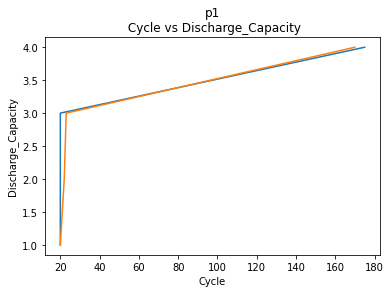

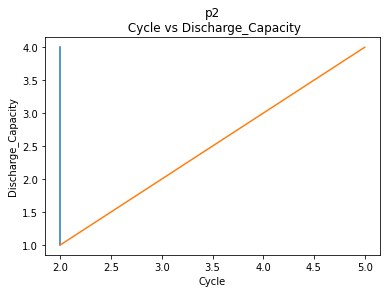

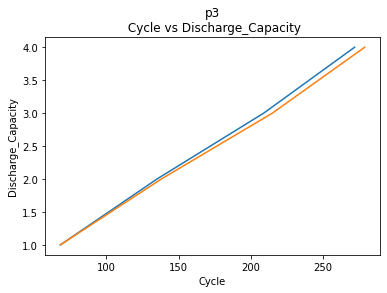

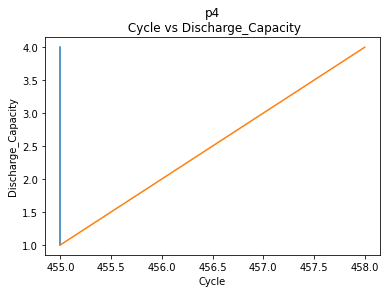

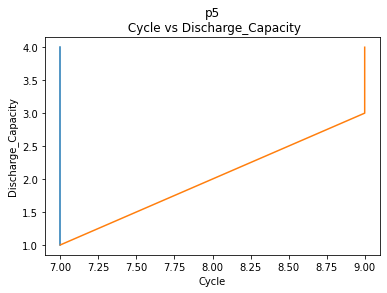

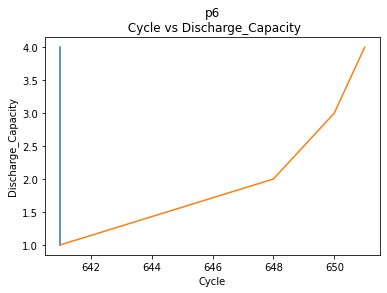

In [60]:
y=[1,2,3,4]

for i in range(df.shape[0]):
    
    x1=list(df1.iloc[i,1:])
    x2=list(df2.iloc[i,1:])
    plt.plot(x1,y)
    plt.plot(x2,y)

#     print(df1.iloc[i,0],df2.iloc[i,0])
    plt.xlabel('Cycle') 
    plt.ylabel('Discharge_Capacity') 
    plt.title(df1.iloc[i,0] + '\n Cycle vs Discharge_Capacity')
#     plt.legend(df1.iloc[i,0])
    plt.show()